In [ ]:
#Data initisalisation
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/raw_tickets_data.csv")  # Adjust path if needed
#df = pd.read_csv("../data/hospo_support_tickets_messy.csv")
# Display basic structure
print(df.info())  # Column types & missing values
print(df.head(10))  # First 10 rows
print(df.tail(10))  # Last 10 rows


# Summary statistics
print(df.describe(include='all'))  # Summary for numerical & categorical data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ticket_id            1050 non-null   object 
 1   venue_name           1050 non-null   object 
 2   venue_type           1050 non-null   object 
 3   state                1050 non-null   object 
 4   issue_category       1050 non-null   object 
 5   priority             1030 non-null   object 
 6   created_date         1050 non-null   object 
 7   resolved_date        1050 non-null   object 
 8   response_time_hrs    1050 non-null   float64
 9   resolution_time_hrs  1050 non-null   float64
 10  csat_score           868 non-null    float64
 11  assigned_agent       1050 non-null   object 
dtypes: float64(3), object(9)
memory usage: 98.6+ KB
None
  ticket_id                     venue_name  venue_type state   issue_category  \
0  TICK1000  Jackson, Miller and Gutierrez        Cafe

In [ ]:
#Date time format uniformity


df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['resolved_date'] = pd.to_datetime(df['resolved_date'], errors='coerce')
print(df.dtypes)

ticket_id                      object
venue_name                     object
venue_type                     object
state                          object
issue_category                 object
priority                       object
created_date           datetime64[ns]
resolved_date          datetime64[ns]
response_time_hrs             float64
resolution_time_hrs           float64
csat_score                    float64
assigned_agent                 object
dtype: object


In [ ]:
#De-duplication
df = df.drop_duplicates()
print(f"Remaining Rows After Deduplication: {len(df)}")

Remaining Rows After Deduplication: 1000


In [23]:
# Trim whitespace from all text columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Standardize column names (lowercase, replace spaces with underscores)
df.columns = df.columns.str.lower().str.replace(' ', '_')

C:\Users\andre\AppData\Local\Temp\ipykernel_24592\3691611514.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [24]:
# Fill missing CSAT scores with median
df['csat_score'].fillna(df['csat_score'].median(), inplace=True)

# Fill missing priority values with 'Medium' (assumption)
df['priority'].fillna('Medium', inplace=True)

print(df.isnull().sum())  # Check remaining missing values


ticket_id              0
venue_name             0
venue_type             0
state                  0
issue_category         0
priority               0
created_date           0
resolved_date          0
response_time_hrs      0
resolution_time_hrs    0
csat_score             0
assigned_agent         0
dtype: int64


C:\Users\andre\AppData\Local\Temp\ipykernel_24592\1645150120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['csat_score'].fillna(df['csat_score'].median(), inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_24592\1645150120.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

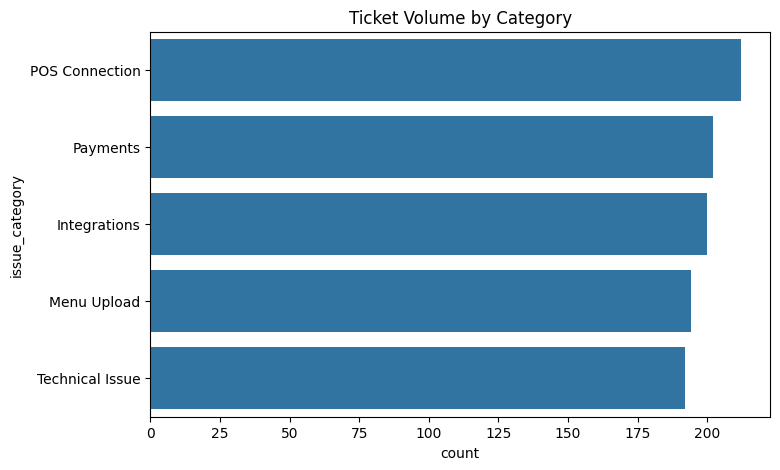

In [ ]:
#Ticket Volume by Category

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(y=df['issue_category'], order=df['issue_category'].value_counts().index)
plt.title("Ticket Volume by Category")
plt.show()



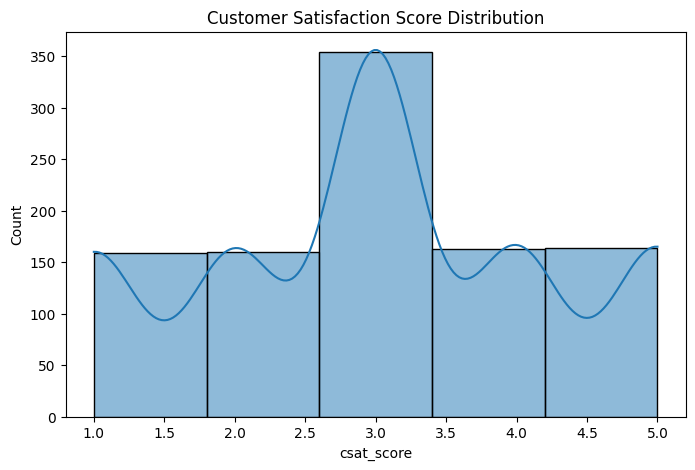

In [ ]:
#Customer Satisfaction Score (CSAT) Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['csat_score'], bins=5, kde=True)
plt.title("Customer Satisfaction Score Distribution")
plt.show()


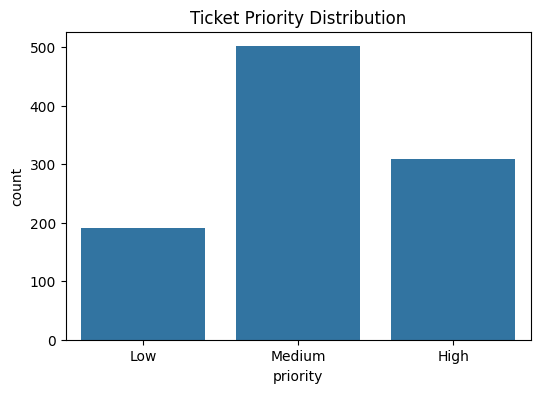

In [ ]:
#Ticket Priority Distribution

plt.figure(figsize=(6,4))
sns.countplot(x=df['priority'], order=["Low", "Medium", "High"])
plt.title("Ticket Priority Distribution")
plt.show()
